# 2020.12.08
# AI 23


#### Deep Convolutional neural network ppt
#### RNN.ppt

deep learning 
- CNN → Vision
- RNN → sequential(time-series, text)
- LSTM

#### Apple Stock Prediction

http://cs231n.stanford.edu/syllabus.html


======================================================

## Apple Stock Prediction


In [241]:
import tensorflow as tf
import numpy as np
import pandas as pd
import keras
import matplotlib as plt
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

from keras import layers
from keras import models

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM

In [242]:
training_dataset = pd.read_csv('apple.csv')
training_dataset.head(3)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,27.428730,27.566240,27.293790,27.503268,123432400.0
1,2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.579091,27.706320,27.405597,27.550818,150476200.0
2,2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.550818,27.660055,27.084312,27.112585,138040000.0


In [243]:
# null 값 체크
print(training_dataset.isnull().sum())
total_null = training_dataset.isnull().sum().sum()
print("총 null 값 :", total_null)

Date           0
Open           0
High           0
Low            0
Close          0
Volume         0
Ex-Dividend    0
Split Ratio    0
Adj. Open      0
Adj. High      0
Adj. Low       0
Adj. Close     0
Adj. Volume    0
dtype: int64
총 null 값 : 0


In [244]:
# 필요없는 부분 버리기
# Open, High, Low 만 남겨둔다.
tmp = ['Date', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio', 'Adj. Open','Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']
training_dataset.drop(tmp, axis=1, inplace = True)

<AxesSubplot:title={'center':'Apple Stock Prices'}>

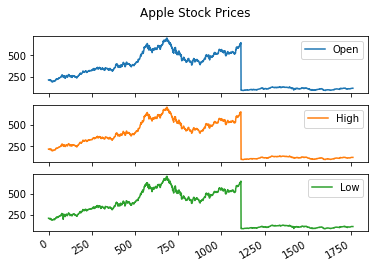

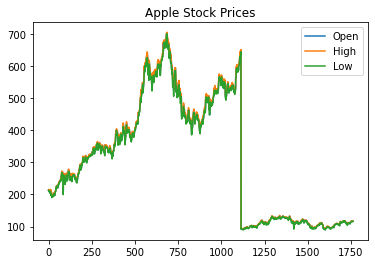

In [245]:
# 남겨진 데이터들을 확인한다.
training_dataset.plot.line(subplots=True, title='Apple Stock Prices')
training_dataset.plot(title="Apple Stock Prices")

In [246]:
# High, Low가 Open과 비슷한 추세여서 버린다.
training_dataset.drop(['High', 'Low'], axis=1, inplace=True)

print("2개 버리기 전")
print(training_dataset)
print(training_dataset.shape)

# 끝 부분 2개를 버린다.
training_dataset.drop(training_dataset.tail(2).index, inplace=True)

print("2개 버린 후")
print(training_dataset)
print(training_dataset.shape)


2개 버리기 전
        Open
0     213.43
1     214.60
2     214.38
3     211.75
4     210.30
...      ...
1757  115.59
1758  116.52
1759  117.52
1760  116.45
1761  116.65

[1762 rows x 1 columns]
(1762, 1)
2개 버린 후
        Open
0     213.43
1     214.60
2     214.38
3     211.75
4     210.30
...      ...
1755  116.80
1756  116.35
1757  115.59
1758  116.52
1759  117.52

[1760 rows x 1 columns]
(1760, 1)


In [247]:
# 데이터를 numpy array로 바꾼다.
train_data = training_dataset.to_numpy()
train_data

array([[213.43],
       [214.6 ],
       [214.38],
       ...,
       [115.59],
       [116.52],
       [117.52]])

In [248]:
# 데이터를 80%만 train 데이터로 사용하기 위해서 분리 작업을 한다.
dataset_train = np.array(train_data[:int(train_data.shape[0]*0.8)])
dataset_test = np.array(train_data[int(train_data.shape[0]*0.8):])

print(dataset_train.shape)
print(dataset_test.shape)

dataset_train

(1408, 1)
(352, 1)


array([[213.43],
       [214.6 ],
       [214.38],
       ...,
       [117.42],
       [112.95],
       [115.97]])

In [249]:
# 스케일링한다.
scalar = MinMaxScaler(feature_range = (0, 1))
train_data = scalar.fit_transform(dataset_train)
print(train_data)

# 데이터 정의를 위해서 갯수를 본다.
train_data.shape

[[0.20127409]
 [0.20318523]
 [0.20282587]
 ...
 [0.04444626]
 [0.03714472]
 [0.04207775]]


(1408, 1)

In [250]:
# x_train과 y_train을 정의한다.
x_train = train_data[0:1407]
y_train = train_data[1:1408]

x_train = np.reshape(x_train, (1407, 1, 1))
print(x_train.shape)
print(y_train.shape)

(1407, 1, 1)
(1407, 1)


In [251]:
model = Sequential()

model.add(LSTM(units=32, return_sequences=True, input_shape=(1, 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=32))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_90 (LSTM)               (None, 1, 32)             4352      
_________________________________________________________________
dropout_88 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_91 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_89 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_92 (LSTM)               (None, 1, 32)             8320      
_________________________________________________________________
dropout_90 (Dropout)         (None, 1, 32)             0         
_________________________________________________________________
lstm_93 (LSTM)               (None, 32)              

In [252]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.fit(x_train, y_train, epochs=5, batch_size = 4)

Epoch 1/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0575
Epoch 2/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0109
Epoch 3/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0073
Epoch 4/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0057
Epoch 5/5
352/352 [==============================] - 1s 2ms/step - loss: 0.0048


In [253]:
print(dataset_test)
print(dataset_test.shape)

[[114.58 ]
 [116.53 ]
 [117.81 ]
 [112.53 ]
 [116.04 ]
 [114.32 ]
 [116.04 ]
 [116.43 ]
 [116.1  ]
 [114.08 ]
 [110.43 ]
 [ 94.87 ]
 [111.11 ]
 [107.085]
 [112.25 ]
 [112.17 ]
 [112.13 ]
 [110.18 ]
 [110.   ]
 [112.49 ]
 [108.97 ]
 [111.65 ]
 [113.76 ]
 [110.27 ]
 [111.79 ]
 [116.58 ]
 [115.93 ]
 [116.25 ]
 [115.66 ]
 [112.21 ]
 [113.67 ]
 [113.38 ]
 [113.63 ]
 [113.25 ]
 [116.44 ]
 [113.85 ]
 [112.83 ]
 [110.17 ]
 [109.07 ]
 [108.01 ]
 [109.88 ]
 [110.63 ]
 [111.74 ]
 [110.19 ]
 [110.   ]
 [112.73 ]
 [110.82 ]
 [111.29 ]
 [110.93 ]
 [111.78 ]
 [110.8  ]
 [111.34 ]
 [114.   ]
 [114.33 ]
 [116.7  ]
 [118.08 ]
 [115.4  ]
 [116.93 ]
 [118.7  ]
 [120.99 ]
 [119.87 ]
 [120.79 ]
 [123.13 ]
 [121.85 ]
 [121.11 ]
 [120.96 ]
 [116.9  ]
 [116.37 ]
 [116.26 ]
 [115.2  ]
 [111.38 ]
 [114.92 ]
 [115.76 ]
 [117.64 ]
 [119.2  ]
 [119.27 ]
 [117.33 ]
 [119.21 ]
 [118.29 ]
 [117.99 ]
 [118.75 ]
 [117.05 ]
 [116.55 ]
 [115.29 ]
 [118.98 ]
 [117.52 ]
 [117.64 ]
 [116.04 ]
 [115.19 ]
 [112.18 ]
 [111.94 ]

In [254]:
inputs = np.reshape(scalar.transform(dataset_test), (352,1,1))

stock_prediction = scalar.inverse_transform(model.predict(inputs))
stock_prediction

array([[122.83572 ],
       [124.61038 ],
       [125.777466],
       [120.97432 ],
       [124.16408 ],
       [122.599396],
       [124.16408 ],
       [124.51928 ],
       [124.218704],
       [122.38132 ],
       [119.0721  ],
       [105.123314],
       [119.68754 ],
       [116.05171 ],
       [120.720436],
       [120.647896],
       [120.61165 ],
       [118.84595 ],
       [118.68316 ],
       [120.93804 ],
       [117.752335],
       [120.176636],
       [122.09064 ],
       [118.92735 ],
       [120.30349 ],
       [124.65594 ],
       [124.0639  ],
       [124.35532 ],
       [123.818115],
       [120.684166],
       [122.00889 ],
       [121.74559 ],
       [121.97258 ],
       [121.62757 ],
       [124.52837 ],
       [122.17238 ],
       [121.246445],
       [118.83691 ],
       [117.84266 ],
       [116.88577 ],
       [118.57465 ],
       [119.25307 ],
       [120.25818 ],
       [118.85501 ],
       [118.68316 ],
       [121.15573 ],
       [119.42502 ],
       [119.8

In [255]:
stock_prediction = stock_prediction.reshape(-1,1)
stock_prediction

array([[122.83572 ],
       [124.61038 ],
       [125.777466],
       [120.97432 ],
       [124.16408 ],
       [122.599396],
       [124.16408 ],
       [124.51928 ],
       [124.218704],
       [122.38132 ],
       [119.0721  ],
       [105.123314],
       [119.68754 ],
       [116.05171 ],
       [120.720436],
       [120.647896],
       [120.61165 ],
       [118.84595 ],
       [118.68316 ],
       [120.93804 ],
       [117.752335],
       [120.176636],
       [122.09064 ],
       [118.92735 ],
       [120.30349 ],
       [124.65594 ],
       [124.0639  ],
       [124.35532 ],
       [123.818115],
       [120.684166],
       [122.00889 ],
       [121.74559 ],
       [121.97258 ],
       [121.62757 ],
       [124.52837 ],
       [122.17238 ],
       [121.246445],
       [118.83691 ],
       [117.84266 ],
       [116.88577 ],
       [118.57465 ],
       [119.25307 ],
       [120.25818 ],
       [118.85501 ],
       [118.68316 ],
       [121.15573 ],
       [119.42502 ],
       [119.8

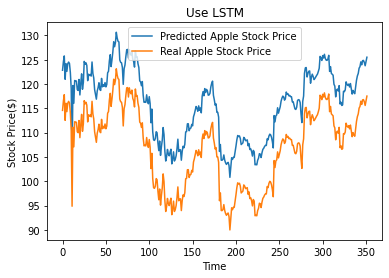

In [256]:
# 그래프로 확인하자.
plt.plot(stock_prediction, label='Predicted Apple Stock Price', linewidth=1.5)
plt.plot(dataset_test, label='Real Apple Stock Price', linewidth=1.5)
plt.title("Use LSTM")
plt.xlabel('Time')
plt.ylabel('Stock Price($)')
plt.legend()
plt.show()

In [257]:
rmse_value = math.sqrt(mean_squared_error(dataset_test, stock_prediction))
rmse_value = round(rmse_value, 3)
print("rmse 값 :", rmse_value)

maxValTest = round(float(max(dataset_test)), 2)
minValTest = round(float(min(dataset_test)), 2)
print("실제 max 가격 :", maxValTest, "달러")
print("실제 min 가격 :", minValTest, "달러")

maxValPredict = round(float(max(stock_prediction)), 2)
minValPredict = round(float(min(stock_prediction)), 2)
print("예상 max 가격 :", maxValPredict, "달러")
print("예상 min 가격 :", minValPredict, "달러")

total = 0
for i, j in zip(dataset_test, stock_prediction):
    value = abs(i - j)/abs(i)
    total += value

error = float(total*100/len(dataset_test))
mape = round(error, 1)
accuracy = 100-mape
print(f"LSTM 사용 예측 정확도 : {str(accuracy)}%")

rmse 값 : 9.032
실제 max 가격 : 123.13 달러
실제 min 가격 : 90.0 달러
예상 max 가격 : 130.65 달러
예상 min 가격 : 100.81 달러
LSTM 사용 예측 정확도 : 91.5%


#### EPOCH 값을 15했을 때 보다 5로 했을 경우가 정확도가 더 높다. 15로 했을 경우 85.5%, 5로 했을 경우 96.6%

#### EPOCH의 값을 5로 고정하고 32를 128과 256으로 변경한다면?
#### - 128의 경우 : 98.7% 올라갔다.
#### - 256의 경우 : 84.0% 떨어졌다.

#### 
#### Stack을 2개 빼거나 2개 더해보면 어떻게 될까(EPOCH 5, Unit 32)
#### - 2개 뺀 경우 : 88.9% 
#### - 1개 뺀 경우 : 92.3% 
#### - 1개 더한 경우 : 87.0% 
#### - 2개 더한 경우 :  74.9%
#### - 3개 더한 경우 : 76.1% 
#### - 4개 더한 경우 : 52.1% 

https://keras.io/ko/optimizers/
#### adam 대신 nadam 써보면 어떻게 될까.
#### - adam
#### - nadam
#### - sgd(확률적 경사 하강법)
#### - RMSprop
#### - Adagrad 
#### - Adadelta
#### - Adamax 

#### 할때마다 값이 달라져서...

https://www.slideshare.net/yongho/ss-79607172

=======================================================

## 텍스트 마이닝과 텍스트 분류 실습

***TF(Term Frequency)-IDF 특정 문서에서만 단어의 빈도수가 높아야지 값이 높아진다.(예: 대통령, 오늘)***